In [164]:
# Загружаем необходимые библиотеки

from scipy.io import wavfile
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import Audio
import numpy as np
import plotly
import plotly.graph_objs as go 
import plotly.express as ps

%matplotlib inline

In [165]:
sample_rate, data = wavfile.read('10.wav')

In [166]:
sample_rate

22050

In [167]:
len(data)

66150

In [168]:
Audio(data=data,rate=sample_rate)

In [171]:
T = len(data) / sample_rate
t = np.linspace(0,T,len(data))
A = []
fi = []

for k in range(0,10000):
    a = 2/T * np.sum(data * np.cos(2*np.pi*k*t))
    b = 2/T * np.sum(data * np.sin(2*np.pi*k*t))
    A.append(np.sqrt(a**2+b**2))
    fi.append(np.arctan(b/a))

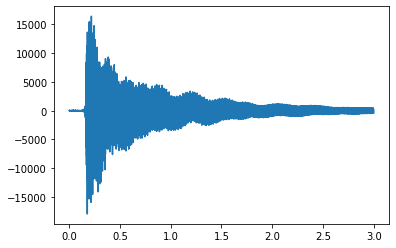

In [172]:
plt.plot(t, data)
plt.show()

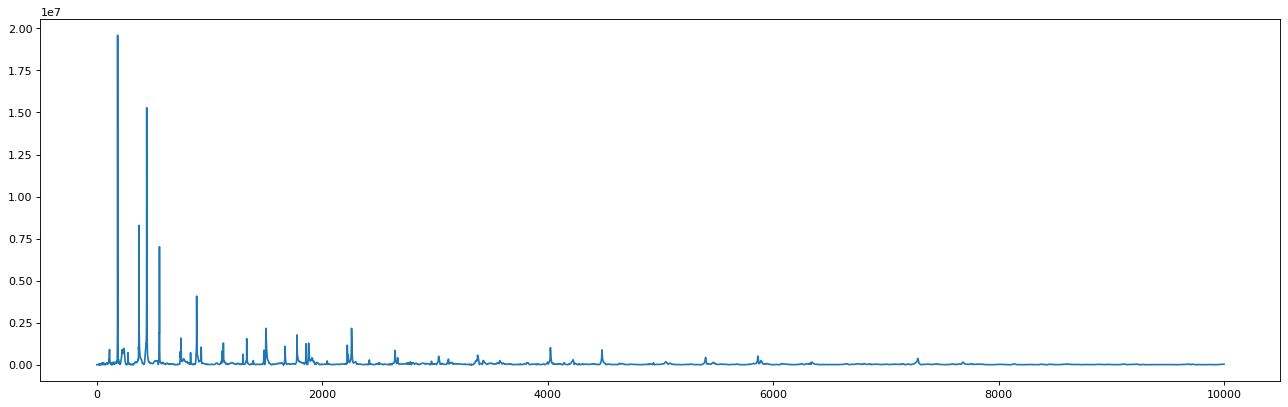

In [173]:
fig, ax = plt.subplots(figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(0,10000),A)
plt.show()

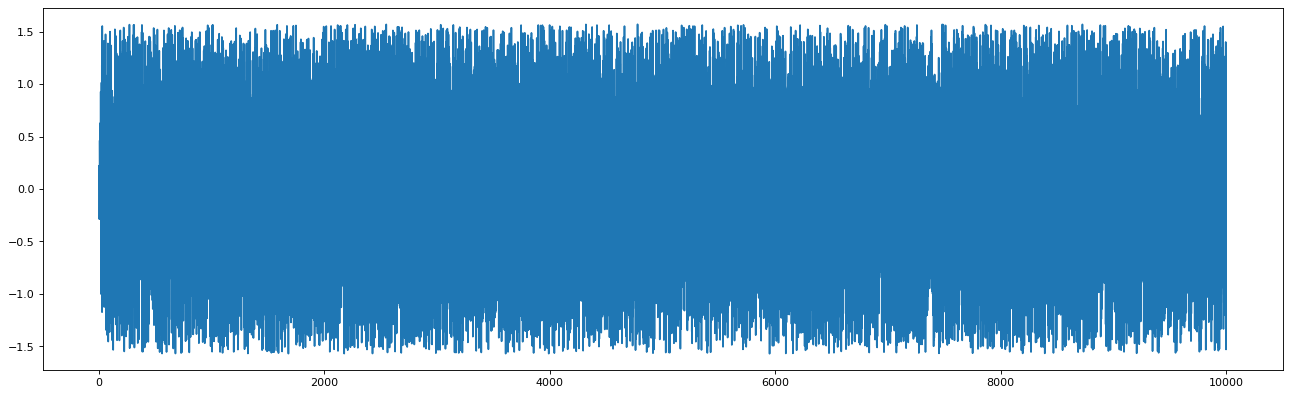

In [174]:
fig, ax = plt.subplots(figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(0,10000),fi)
plt.show()

In [162]:
res = fft(data,sample_rate)
res = [abs(i) for i in res]

left = 0 
right = 5000

In [163]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = np.arange(left, right), y = res, mode = 'lines+markers'))
fig.show()

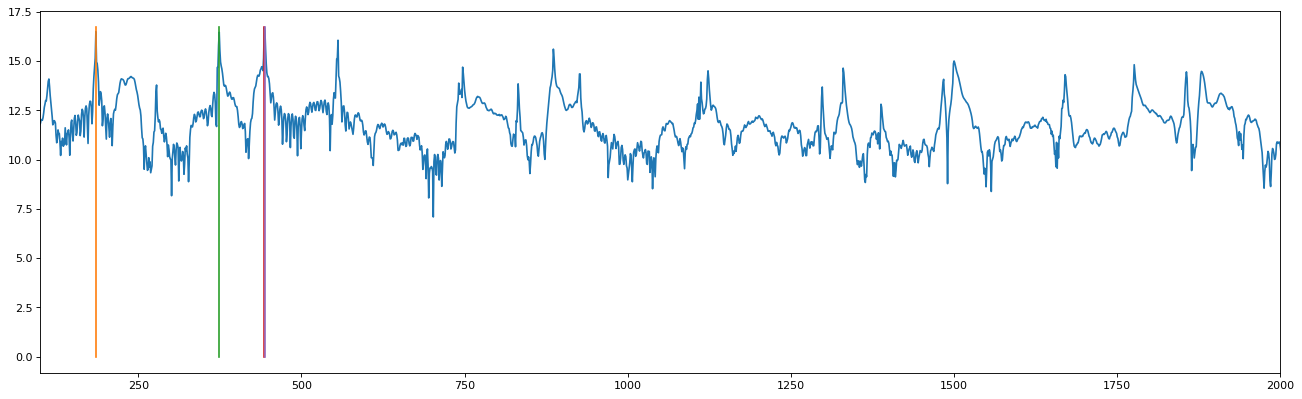

In [136]:
# Применяем к сигналу быстрое преобразование Фурье
res = fft(data,sample_rate)
res = [abs(i) for i in res]

left = 0 
right = 5000

highest = (sorted(res)[-8:])
highest = np.unique(highest)

notes = []
for freq, intensity in zip (range(left,right), res):
    if intensity in highest:
        notes.append(freq)

# figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k') # указываем параметры фигуры для графика
fig, ax = plt.subplots(figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

ax.plot(range(left,right),np.log(res[left:right])) # График АЧХ (логорифмированный)

# В следующем цикле рисуются вертикальные линии и подписываются ноты
for i,note in enumerate(notes): 
    if left < note < right:
        ax.plot([note,note],[0,max(np.log(res[left:right]))])

ax.set_xlim(100,2000)
plt.show()

In [120]:
notes

[185, 374, 443, 444]